Step 0/10000
Step 100/10000
Step 200/10000
Step 300/10000
Step 400/10000
Step 500/10000
Step 600/10000
Step 700/10000
Step 800/10000
Step 900/10000
Step 1000/10000
Step 1100/10000
Step 1200/10000
Step 1300/10000
Step 1400/10000
Step 1500/10000
Step 1600/10000
Step 1700/10000
Step 1800/10000
Step 1900/10000
Step 2000/10000
Step 2100/10000
Step 2200/10000
Step 2300/10000
Step 2400/10000
Step 2500/10000
Step 2600/10000
Step 2700/10000
Step 2800/10000
Step 2900/10000
Step 3000/10000
Step 3100/10000
Step 3200/10000
Step 3300/10000
Step 3400/10000
Step 3500/10000
Step 3600/10000
Step 3700/10000
Step 3800/10000
Step 3900/10000
Step 4000/10000
Step 4100/10000
Step 4200/10000
Step 4300/10000
Step 4400/10000
Step 4500/10000
Step 4600/10000
Step 4700/10000
Step 4800/10000
Step 4900/10000
Step 5000/10000
Step 5100/10000
Step 5200/10000
Step 5300/10000
Step 5400/10000
Step 5500/10000
Step 5600/10000
Step 5700/10000
Step 5800/10000
Step 5900/10000
Step 6000/10000
Step 6100/10000
Step 6200/10000
Step

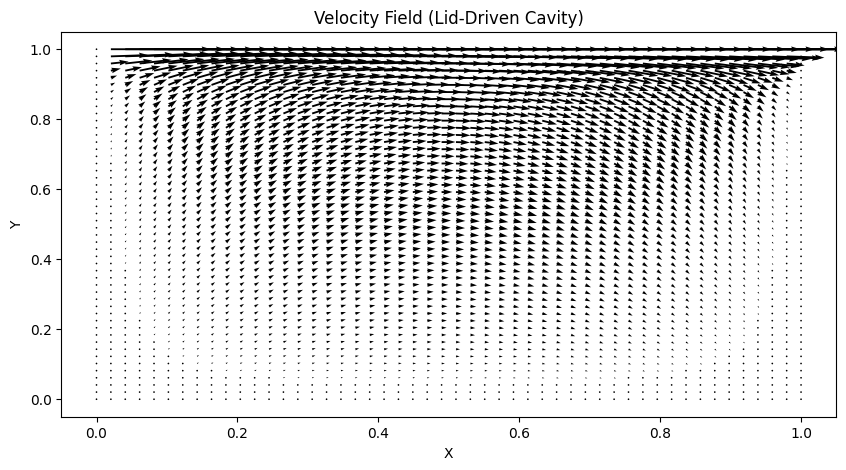

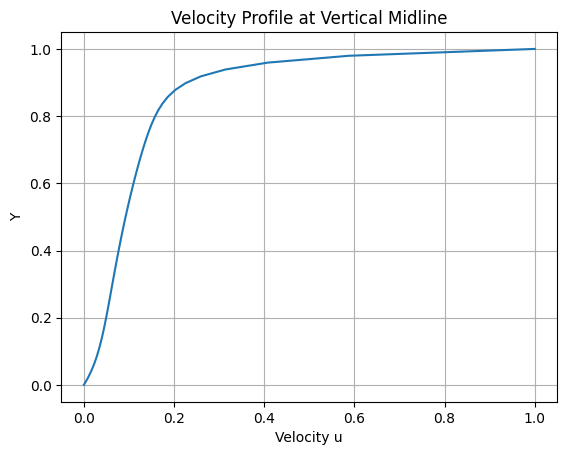

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0            # Length of the cavity (1x1 square domain)
N = 50             # Grid resolution (NxN grid)
Re = 100.0         # Reynolds number
U = 1.0            # Lid velocity
nu = U * L / Re    # Kinematic viscosity
dt = 0.001         # Time step
T = 10.0           # Total simulation time

# Derived parameters
dx = L / (N - 1)   # Grid spacing in x
dy = L / (N - 1)   # Grid spacing in y
nt = int(T / dt)   # Number of time steps

# Initialize fields
u = np.zeros((N, N))  # x-velocity
v = np.zeros((N, N))  # y-velocity
p = np.zeros((N, N))  # Pressure

# Helper function for Laplacian
def laplacian(field, dx, dy):
    return (
        (np.roll(field, -1, axis=0) - 2 * field + np.roll(field, 1, axis=0)) / dx**2 +
        (np.roll(field, -1, axis=1) - 2 * field + np.roll(field, 1, axis=1)) / dy**2
    )

# Boundary conditions
def apply_boundary_conditions(u, v):
    u[0, :] = 0.0    # Bottom wall
    u[-1, :] = U     # Top wall (lid driven)
    u[:, 0] = 0.0    # Left wall
    u[:, -1] = 0.0   # Right wall

    v[0, :] = 0.0    # Bottom wall
    v[-1, :] = 0.0   # Top wall
    v[:, 0] = 0.0    # Left wall
    v[:, -1] = 0.0   # Right wall

# Main simulation loop
for n in range(nt):
    # Compute intermediate velocity fields (u*, v*)
    un = u.copy()
    vn = v.copy()

    u_star = un + dt * (
        -un * (un - np.roll(un, 1, axis=0)) / dx
        - vn * (un - np.roll(un, 1, axis=1)) / dy
        + nu * laplacian(un, dx, dy)
    )

    v_star = vn + dt * (
        -un * (vn - np.roll(vn, 1, axis=0)) / dx
        - vn * (vn - np.roll(vn, 1, axis=1)) / dy
        + nu * laplacian(vn, dx, dy)
    )

    # Solve for pressure (Poisson equation)
    rhs = (np.roll(u_star, -1, axis=0) - np.roll(u_star, 1, axis=0)) / (2 * dx) + \
          (np.roll(v_star, -1, axis=1) - np.roll(v_star, 1, axis=1)) / (2 * dy)

    for _ in range(50):  # Gauss-Seidel iterations for pressure
        pn = p.copy()
        p[1:-1, 1:-1] = (
            (pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
            (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
            rhs[1:-1, 1:-1] * dx**2 * dy**2
        ) / (2 * (dx**2 + dy**2))

    # Correct velocity fields
    u[1:-1, 1:-1] = u_star[1:-1, 1:-1] - dt * (p[2:, 1:-1] - p[:-2, 1:-1]) / (2 * dx)
    v[1:-1, 1:-1] = v_star[1:-1, 1:-1] - dt * (p[1:-1, 2:] - p[1:-1, :-2]) / (2 * dy)

    # Apply boundary conditions
    apply_boundary_conditions(u, v)

    # Print progress
    if n % 100 == 0:
        print(f"Step {n}/{nt}")

# Plot results
X, Y = np.meshgrid(np.linspace(0, L, N), np.linspace(0, L, N))

plt.figure(figsize=(10, 5))
plt.quiver(X, Y, u, v, scale=1, scale_units='inches')
plt.title("Velocity Field (Lid-Driven Cavity)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Velocity profile at vertical midline
mid_x = N // 2
plt.plot(u[:, mid_x], np.linspace(0, L, N))
plt.title("Velocity Profile at Vertical Midline")
plt.xlabel("Velocity u")
plt.ylabel("Y")
plt.grid()
plt.show()